In [1]:
import pandas as pd

# Load the dataset 
file_path = r"C:\Users\punee\Downloads\Aditi coding\RFLFSODataFull.csv"
data = pd.read_csv(file_path)

# Creating separate data subsets for each weather condition
clear_data = data[data['SYNOPCode'] == 0]      
dust_storm_data = data[data['SYNOPCode'] == 3] 
fog_data = data[data['SYNOPCode'] == 4]         
drizzle_data = data[data['SYNOPCode'] == 5]    
rain_data = data[data['SYNOPCode'] == 6]        
snow_data = data[data['SYNOPCode'] == 7]        
showers_data = data[data['SYNOPCode'] == 8]    

# Verify the size of each subset 
print("Number of entries in each subset:")
print("Clear:", len(clear_data))
print("Dust Storm:", len(dust_storm_data))
print("Fog:", len(fog_data))
print("Drizzle:", len(drizzle_data))
print("Rain:", len(rain_data))
print("Snow:", len(snow_data))
print("Showers:", len(showers_data))

Number of entries in each subset:
Clear: 56964
Dust Storm: 191
Fog: 466
Drizzle: 6605
Rain: 25018
Snow: 419
Showers: 1716


In [2]:
# Filter the data to get only the "Rain" weather condition 
rain_data = data[data['SYNOPCode'] == 6]
# Filter rows with RFL data (where 'RFL_Att' has values)
rain_rfl_data = rain_data.dropna(subset=['RFL_Att'])

# Filter rows with FSO data (where 'FSO_Att' has values)
rain_fso_data = rain_data.dropna(subset=['FSO_Att'])

# Verify the sizes of each subset
print("Number of entries in Rain (RFL):", len(rain_rfl_data))
print("Number of entries in Rain (FSO):", len(rain_fso_data))


Number of entries in Rain (RFL): 25018
Number of entries in Rain (FSO): 25018


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already run Step 1 and created rain_rfl_data and rain_fso_data

def evaluate_models(data, target_column):
    # Drop columns that are not predictors (SYNOPCode, RFL_Att, FSO_Att)
    predictors = data.drop(columns=['SYNOPCode', 'RFL_Att', 'FSO_Att'])
    target = data[target_column]  # Set the target column, either 'RFL_Att' or 'FSO_Att'
    
    # Prepare to store RMSE and R^2 scores for each feature removed
    rmse_scores = []
    r2_scores = []
    removed_features = []

    # Loop through each column, removing it and training a model
    for feature in predictors.columns:
        # Drop the feature from the predictors
        predictors_subset = predictors.drop(columns=[feature])
        
        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(predictors_subset, target, test_size=0.3, random_state=42)
        
        # Train a Random Forest model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Predictions on test data
        y_pred = model.predict(X_test)
        
        # Calculate RMSE and R^2
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Store the results
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        removed_features.append(feature)
        
        # Print results for each model
        print(f"Feature removed: {feature}")
        print(f"RMSE: {rmse:.4f}, R^2: {r2:.4f}")
    
    # Store the results in a DataFrame for easier handling
    results_df = pd.DataFrame({
        'Removed Feature': removed_features,
        'RMSE': rmse_scores,
        'R^2': r2_scores
    })
    
    return results_df

# Run evaluation on Rain RFL data
print("Evaluating models for Rain Weather - RFL subset")
rain_rfl_results = evaluate_models(rain_rfl_data, target_column='RFL_Att')

# Run evaluation on Rain FSO data
print("\nEvaluating models for Rain Weather - FSO subset")
rain_fso_results = evaluate_models(rain_fso_data, target_column='FSO_Att')


Evaluating models for Rain Weather - RFL subset
Feature removed: AbsoluteHumidity
RMSE: 0.7862, R^2: 0.9608
Feature removed: AbsoluteHumidityMax
RMSE: 0.7506, R^2: 0.9643
Feature removed: AbsoluteHumidityMin
RMSE: 0.7508, R^2: 0.9643
Feature removed: Distance
RMSE: 0.8921, R^2: 0.9496
Feature removed: Frequency
RMSE: 0.8811, R^2: 0.9508
Feature removed: Particulate
RMSE: 0.7560, R^2: 0.9638
Feature removed: ParticulateMax
RMSE: 0.7469, R^2: 0.9647
Feature removed: ParticulateMin
RMSE: 0.7644, R^2: 0.9630
Feature removed: RainIntensity
RMSE: 0.7558, R^2: 0.9638
Feature removed: RainIntensityMax
RMSE: 0.7560, R^2: 0.9638
Feature removed: RainIntensityMin
RMSE: 0.7510, R^2: 0.9643
Feature removed: RelativeHumidity
RMSE: 0.7852, R^2: 0.9609
Feature removed: Temperature
RMSE: 0.7442, R^2: 0.9649
Feature removed: TemperatureDifference
RMSE: 0.7976, R^2: 0.9597
Feature removed: TemperatureMax
RMSE: 0.7519, R^2: 0.9642
Feature removed: TemperatureMin
RMSE: 0.7510, R^2: 0.9643
Feature removed: 

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def final_random_forest_model(data, target_column):
    # Drop non-predictor columns (SYNOPCode, RFL_Att, FSO_Att)
    predictors = data.drop(columns=['SYNOPCode', 'RFL_Att', 'FSO_Att'])
    target = data[target_column]  # Target is either 'RFL_Att' or 'FSO_Att'

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

    # Train a Random Forest model using all features
    model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
    model.fit(X_train, y_train)

    # Predictions on test data
    y_pred = model.predict(X_test)

    # Calculate RMSE and R^2 for test data
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)

    # Calculate OOB RMSE and R^2 (training data) for comparison
    rmse_oob = np.sqrt(mean_squared_error(y_train, model.oob_prediction_))
    r2_oob = r2_score(y_train, model.oob_prediction_)

    # Print and return results
    print(f"Final Random Forest Model for {target_column}")
    print(f"Test RMSE: {rmse_test:.4f}, Test R^2: {r2_test:.4f}")
    print(f"OOB RMSE (Training): {rmse_oob:.4f}, OOB R^2 (Training): {r2_oob:.4f}")

    return {
        'Test RMSE': rmse_test,
        'Test R^2': r2_test,
        'OOB RMSE (Training)': rmse_oob,
        'OOB R^2 (Training)': r2_oob
    }

# Run final Random Forest model on Rain RFL data
print("Evaluating final model for Rain Weather - RFL subset")
rain_rfl_final_results = final_random_forest_model(rain_rfl_data, target_column='RFL_Att')

# Run final Random Forest model on Rain FSO data
print("\nEvaluating final model for Rain Weather - FSO subset")
rain_fso_final_results = final_random_forest_model(rain_fso_data, target_column='FSO_Att')


Evaluating final model for Rain Weather - RFL subset
Final Random Forest Model for RFL_Att
Test RMSE: 0.7534, Test R^2: 0.9640
OOB RMSE (Training): 0.7912, OOB R^2 (Training): 0.9622

Evaluating final model for Rain Weather - FSO subset
Final Random Forest Model for FSO_Att
Test RMSE: 0.8722, Test R^2: 0.9583
OOB RMSE (Training): 0.9148, OOB R^2 (Training): 0.9553


In [5]:
import pandas as pd

def calculate_feature_importance_differences(results_df, full_model_results):
    # Calculate the absolute differences in RMSE and R^2 between training (OOB) and test datasets
    results_df['RMSE Difference'] = abs(full_model_results['OOB RMSE (Training)'] - results_df['RMSE'])
    results_df['R^2 Difference'] = abs(full_model_results['OOB R^2 (Training)'] - results_df['R^2'])
    
    # Rank features by importance based on the sum of RMSE and R^2 differences
    results_df['Importance Score'] = results_df['RMSE Difference'] + results_df['R^2 Difference']
    
    # Sort by importance score in descending order
    results_df = results_df.sort_values(by='Importance Score', ascending=False).reset_index(drop=True)
    
    return results_df[['Removed Feature', 'RMSE Difference', 'R^2 Difference', 'Importance Score']]

# Example usage:
print("Calculating feature importance for Rain Weather - RFL subset")
rain_rfl_importance = calculate_feature_importance_differences(rain_rfl_results, rain_rfl_final_results)
print(rain_rfl_importance)

print("\nCalculating feature importance for Rain Weather - FSO subset")
rain_fso_importance = calculate_feature_importance_differences(rain_fso_results, rain_fso_final_results)
print(rain_fso_importance)


Calculating feature importance for Rain Weather - RFL subset
          Removed Feature  RMSE Difference  R^2 Difference  Importance Score
0                Distance         0.100954        0.012656          0.113611
1               Frequency         0.089973        0.011422          0.101395
2             Temperature         0.046934        0.002677          0.049610
3           WindDirection         0.044468        0.002444          0.046912
4          ParticulateMax         0.044298        0.002428          0.046726
5     AbsoluteHumidityMax         0.040596        0.002076          0.042672
6     AbsoluteHumidityMin         0.040381        0.002056          0.042437
7        RainIntensityMin         0.040191        0.002038          0.042229
8          TemperatureMin         0.040147        0.002034          0.042181
9          TemperatureMax         0.039253        0.001948          0.041202
10           WindSpeedMax         0.036610        0.001696          0.038306
11          Rai

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

def iterative_feature_removal(data, target_column):
    # Drop non-predictor columns (SYNOPCode, RFL_Att, FSO_Att)
    predictors = data.drop(columns=['SYNOPCode', 'RFL_Att', 'FSO_Att'])
    target = data[target_column]
    
    # Prepare a DataFrame to store the results
    results = pd.DataFrame(columns=['Remaining Features', 'OOB RMSE', 'OOB R^2'])

    # Initialize the list of features to be removed iteratively
    remaining_features = list(predictors.columns)

    while remaining_features:
        # Train the Random Forest model with current set of features
        model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
        model.fit(predictors[remaining_features], target)

        # Calculate OOB RMSE and R^2
        oob_predictions = model.oob_prediction_
        oob_rmse = np.sqrt(mean_squared_error(target, oob_predictions))
        oob_r2 = r2_score(target, oob_predictions)

        # Record the current state
        result_row = pd.DataFrame({
            'Remaining Features': [remaining_features.copy()],
            'OOB RMSE': [oob_rmse],
            'OOB R^2': [oob_r2]
        })
        results = pd.concat([results, result_row], ignore_index=True)

        # Rank features by importance and remove the least important feature
        importances = model.feature_importances_
        least_important_feature = remaining_features[np.argmin(importances)]
        remaining_features.remove(least_important_feature)
        
        # Print the step results
        print(f"Features: {remaining_features}")
        print(f"OOB RMSE: {oob_rmse:.4f}, OOB R^2: {oob_r2:.4f}")
        print(f"Removed Feature: {least_important_feature}\n")
    
    return results

# Run iterative feature removal on Rain RFL subset
print("Iterative feature removal for Rain Weather - RFL subset")
rain_rfl_removal_results = iterative_feature_removal(rain_rfl_data, target_column='RFL_Att')

# Run iterative feature removal on Rain FSO subset
print("\nIterative feature removal for Rain Weather - FSO subset")
rain_fso_removal_results = iterative_feature_removal(rain_fso_data, target_column='FSO_Att')


Iterative feature removal for Rain Weather - RFL subset


C:\Users\punee\AppData\Local\Temp\ipykernel_4076\2406856678.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


Features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
OOB RMSE: 0.6852, OOB R^2: 0.9713
Removed Feature: WindDirection

Features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax']
OOB RMSE: 0.6767, OOB R^2: 0.9720
Removed Feature: WindSpeedMin

Features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidity

C:\Users\punee\AppData\Local\Temp\ipykernel_4076\2406856678.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


Features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
OOB RMSE: 0.8044, OOB R^2: 0.9652
Removed Feature: Frequency

Features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
OOB RMSE: 0.8041, OOB R^2: 0.9652
Removed Feature: WindDirection

Features: ['AbsoluteHumidity', 'AbsoluteHumidityMin', 'Distance', '

In [7]:
print(rain_rfl_removal_results.columns)

Index(['Remaining Features', 'OOB RMSE', 'OOB R^2'], dtype='object')


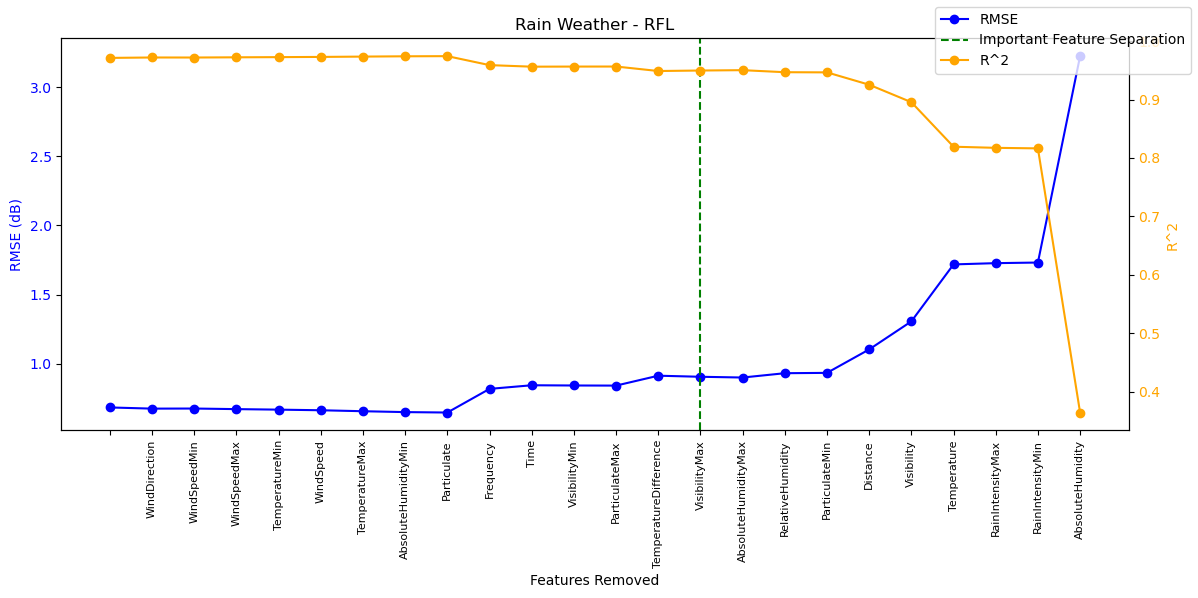

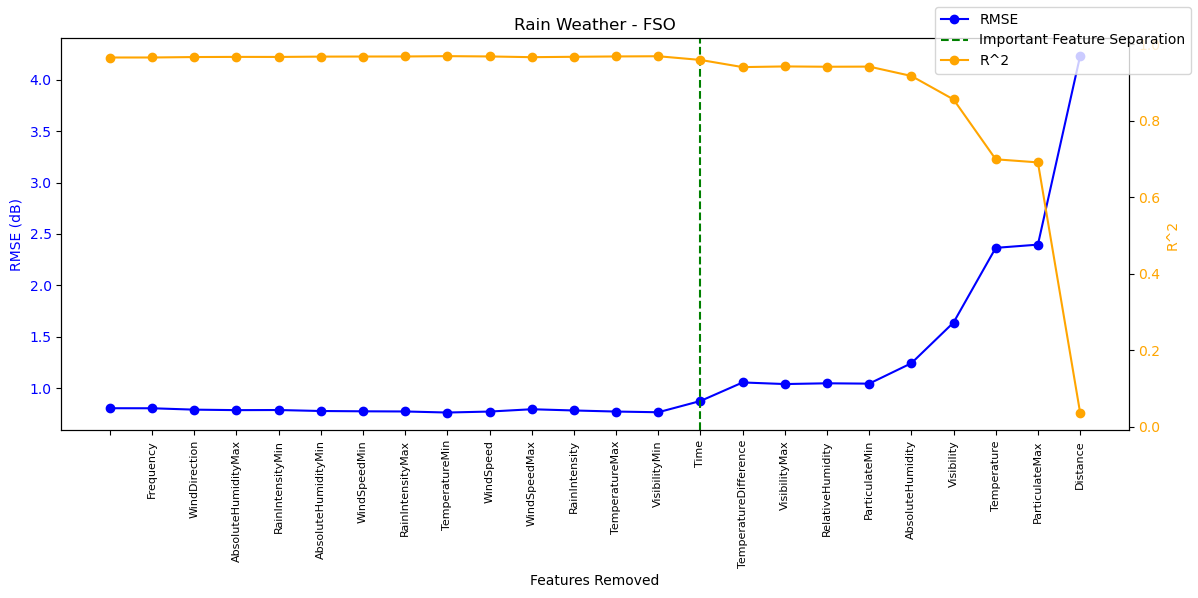

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def add_removed_feature_column(results_df):
    # Extract all features in the initial (first row) 'Remaining Features' column
    all_features = set(results_df['Remaining Features'].iloc[0])
    
    # Initialize a list to store removed features
    removed_features = []
    
    # Set to track already removed features
    remaining_features = all_features.copy()

    # Compute removed features at each step
    for i in range(len(results_df)):
        current_features = set(results_df['Remaining Features'].iloc[i])
        removed = list(remaining_features - current_features)
        
        # Add the removed feature to the list, and remove it from the remaining features set
        if removed:
            removed_feature = removed[0]
            removed_features.append(removed_feature)
            remaining_features.remove(removed_feature)
        else:
            removed_features.append(None)  # No feature removed (last step)

    # Add the new column to the DataFrame
    results_df['Removed Feature'] = removed_features
    return results_df

# Update results DataFrames to include 'Removed Feature'
rain_rfl_removal_results = add_removed_feature_column(rain_rfl_removal_results)
rain_fso_removal_results = add_removed_feature_column(rain_fso_removal_results)

def plot_rmse_r2(results_df, title):
    # Verify columns exist
    expected_columns = ['OOB RMSE', 'OOB R^2', 'Removed Feature']
    for col in expected_columns:
        if col not in results_df.columns:
            raise KeyError(f"Expected column '{col}' not found in DataFrame.")

    # Extract RMSE, R^2 values, and removed features
    rmse_values = results_df['OOB RMSE']
    r2_values = results_df['OOB R^2']
    features_removed = range(len(results_df))
    removed_feature_names = results_df['Removed Feature']

    # Plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(features_removed, rmse_values, color="blue", marker="o", label="RMSE")
    ax1.set_xlabel("Features Removed")
    ax1.set_ylabel("RMSE (dB)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(features_removed, r2_values, color="orange", marker="o", label="R^2")
    ax2.set_ylabel("R^2", color="orange")
    ax2.tick_params(axis="y", labelcolor="orange")

    # Place the removed feature names horizontally under the x-axis
    ax1.set_xticks(features_removed)
    ax1.set_xticklabels(removed_feature_names, rotation=90, ha='center', fontsize=8, color="black")

    separation_point = len(results_df) - 10
    ax1.axvline(x=separation_point, color="green", linestyle="--", label="Important Feature Separation")

    plt.title(title)
    fig.tight_layout()
    fig.legend(loc="upper right")
    plt.show()

# Plot updated DataFrames with removed feature names under the x-axis in order of removal
plot_rmse_r2(rain_rfl_removal_results, "Rain Weather - RFL")
plot_rmse_r2(rain_fso_removal_results, "Rain Weather - FSO")


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Identify features to the right of the green line
def get_important_features(results_df, separation_point):
    # Get the features from the green line to the end of the list
    important_features = results_df['Removed Feature'][separation_point:].dropna().tolist()
    return important_features

# Train Random Forest on selected features
def train_random_forest_on_important_features(data, target_column, important_features):
    # Subset the data to include only the important features
    X = data[important_features]
    y = data[target_column]

    # Initialize and train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
    model.fit(X, y)

    # Calculate RMSE and R^2 on OOB (Out-of-Bag) predictions
    oob_predictions = model.oob_prediction_
    rmse = np.sqrt(mean_squared_error(y, oob_predictions))
    r2 = r2_score(y, oob_predictions)
    
    return rmse, r2, model

# Define the separation point (assuming last 10 features are considered important)
separation_point = len(rain_rfl_removal_results) - 10

# Get important features based on the green line separation for both RFL and FSO
important_features_rfl = get_important_features(rain_rfl_removal_results, separation_point)
important_features_fso = get_important_features(rain_fso_removal_results, separation_point)


# Train and evaluate the model for RFL
rmse_rfl, r2_rfl, model_rfl = train_random_forest_on_important_features(data, 'RFL_Att', important_features_rfl)
print(f"RFL Model - RMSE: {rmse_rfl:.4f}, R^2: {r2_rfl:.4f}")

# Train and evaluate the model for FSO
rmse_fso, r2_fso, model_fso = train_random_forest_on_important_features(data, 'FSO_Att', important_features_fso)
print(f"FSO Model - RMSE: {rmse_fso:.4f}, R^2: {r2_fso:.4f}")


RFL Model - RMSE: 0.7159, R^2: 0.9567
FSO Model - RMSE: 0.7333, R^2: 0.9647
